<a href="https://colab.research.google.com/github/Aytsan11/ML/blob/main/ML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/employee.csv')

In [2]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [3]:
print(df.dtypes)

# Количество уникальных значений
for column in df.columns:
    print(f'{column}: {df[column].nunique()} уникальных значений')

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object
satisfaction_level: 92 уникальных значений
last_evaluation: 65 уникальных значений
number_project: 6 уникальных значений
average_montly_hours: 215 уникальных значений
time_spend_company: 8 уникальных значений
Work_accident: 2 уникальных значений
promotion_last_5years: 2 уникальных значений
department: 10 уникальных значений
salary: 3 уникальных значений
left: 2 уникальных значений


In [4]:
df.salary = df.salary.map({'low': 1, 'medium': 2, 'high': 3})

In [5]:
df = df.drop(columns='department')
#df = df.drop(columns='promotion_last_5years')
#df = df.drop(columns='number_project')

In [6]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,1
14995,0.37,0.48,2,160,3,0,0,1,1
14996,0.37,0.53,2,143,3,0,0,1,1
14997,0.11,0.96,6,280,4,0,0,1,1


In [7]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [8]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,1.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.5,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.5,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,1.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,0.0,0.0,1.0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,0.0,0.0,1.0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,0.0,0.0,1.0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,0.0,0.0,1.0


In [9]:
! pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):

    # преобразуем X в numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X, centroids, labels, step)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

# Берем датасет и визуализируем K-means
interactive_kmeans_visualization(df[:100])

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 2  # Вы можете изменить это значение в соответствии с вашими данными

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = df.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")

Статистика по кластерам:

Статистика для признака 'satisfaction_level':
             mean       std       min       max
Cluster                                        
0        0.633857  0.238576  0.032967  1.000000
1        0.384723  0.290037  0.000000  0.912088

Статистика для признака 'last_evaluation':
             mean       std       min  max
Cluster                                   
0        0.555427  0.253133  0.000000  1.0
1        0.559551  0.308865  0.140625  1.0

Статистика для признака 'number_project':
             mean       std  min  max
Cluster                              
0        0.357333  0.195977  0.0  0.8
1        0.371101  0.363633  0.0  1.0

Статистика для признака 'average_montly_hours':
             mean       std       min       max
Cluster                                        
0        0.481590  0.213471  0.000000  0.892523
1        0.520651  0.285995  0.140187  1.000000

Статистика для признака 'time_spend_company':
             mean       std  min  max

**Кластер 0 (значение признака left равно 0, сотрудник работает):**

* Высокий уровень удовлетворённости: среднее значение satisfaction_level
составляет 0.634.
* Более высокие зарплаты: среднее значение salary равно 0.325, что выше, чем в кластере 1.
* Больше случаев повышения: среднее значение promotion_last_5years составляет 0.026.
* Больше несчастных случаев на работе: среднее значение Work_accident равно 0.175.


**Кластер 1 (значение признака left равно 1, сотрудник уже не работает):**

* Низкий уровень удовлетворённости: среднее значение satisfaction_level составляет 0.385.
* Низкие зарплаты: среднее значение salary равно 0.207.
* Меньше случаев повышения: среднее значение promotion_last_5years составляет 0.005.
* Меньше несчастных случаев на работе: среднее значение Work_accident равно 0.047.

**Ключевые выводы:**

* Уровень удовлетворённости является существенным фактором: сотрудники с более высоким уровнем удовлетворённости остаются в компании.
* Зарплата и продвижение: более высокая зарплата и наличие продвижений связаны с удержанием сотрудников (возможно, являются следствием).
* Рабочая нагрузка: сотрудники, которые покинули компанию, имеют немного более высокие показатели number_project и average_montly_hours, что может указывать на перегрузку.
* Время в компании: сотрудники, которые покинули компанию, в среднем провели больше времени в компании, что может свидетельствовать о недостатке возможностей для развития.
* Несчастные случаи на работе: в кластере оставшихся сотрудников больше несчастных случаев, что может требовать дополнительного исследования.

Коэффициент силуэта равен 0.3439, что указывает на умеренное качество кластеризации. Это значит, что кластеры разделены достаточно чётко, но есть возможность для улучшения модели.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])


Output()

Количество кластеров: 6
Статистика по кластерам:

Статистика для признака 'satisfaction_level':
             mean       std       min       max  count
Cluster                                               
0        0.384369  0.289750  0.000000  0.912088   3387
1        0.389477  0.302110  0.000000  0.912088    165
2        0.634118  0.238334  0.032967  1.000000   9200
3        0.632330  0.241651  0.032967  1.000000   1928
4        0.637507  0.230781  0.065934  1.000000    228
5        0.629731  0.213879  0.076923  1.000000     72

Статистика для признака 'last_evaluation':
             mean       std       min  max  count
Cluster                                          
0        0.560659  0.309005  0.140625  1.0   3387
1        0.560133  0.307368  0.140625  1.0    165
2        0.556479  0.252735  0.000000  1.0   9200
3        0.550895  0.253552  0.000000  1.0   1928
4        0.548725  0.242687  0.015625  1.0    228
5        0.563585  0.320564  0.031250  1.0     72

Статистика для приз

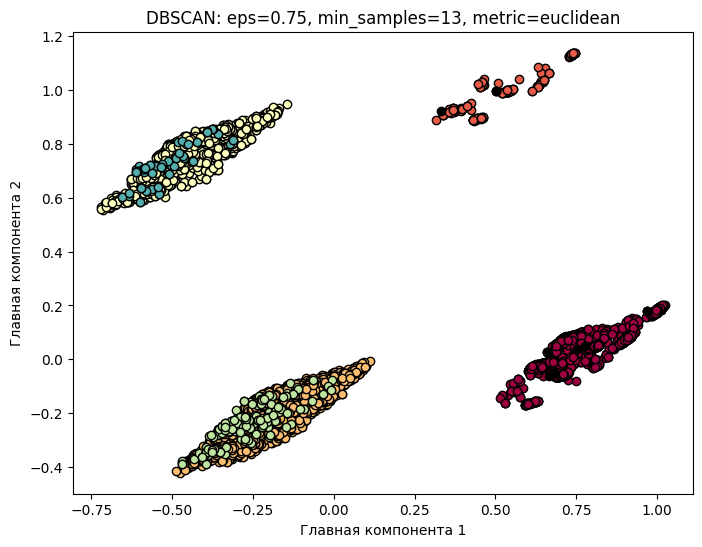

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.75
min_samples = 13
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()


**Общие наблюдения:**

**Сотрудники, которые покинули компанию (left = 1.0).**

*Кластер 0:*

* Количество сотрудников: 3387.
* Несчастные случаи на работе: нет (Work_accident = 0.0).
* Уровень удовлетворённости: низкий (mean = 0.384).

*Кластер 1:*
* Количество сотрудников: 165.
* Несчастные случаи на работе: да (Work_accident = 1.0).
* Уровень удовлетворённости: низкий (mean = 0.389).

**Сотрудники, которые остались в компании без повышения (left = 0.0, promotion_last_5years = 0.0).**

*Кластер 2:*
* Количество сотрудников: 9200.
* Несчастные случаи на работе: нет (Work_accident = 0.0).
Уровень удовлетворённости: высокий (mean = 0.634).

*Кластер 3:*
* Количество сотрудников: 1928.
* Несчастные случаи на работе: да (Work_accident = 1.0).
* Уровень удовлетворённости: высокий (mean = 0.632).

**Сотрудники, которые остались в компании и получили повышение (promotion_last_5years = 1.0).**

*Кластер 4:*
* Количество сотрудников: 228.
* Несчастные случаи на работе: нет (Work_accident = 0.0).
* Уровень удовлетворённости: высокий (mean = 0.638).

*Кластер 5:*
* Количество сотрудников: 72.
* Несчастные случаи на работе: да (Work_accident = 1.0).
* Уровень удовлетворённости: высокий (mean = 0.630).


**Анализ по признакам:**

* *Уровень удовлетворённости (satisfaction_level):* покинувшие сотрудники (кластеры 0 и 1) имеют низкий уровень удовлетворённости (примерно 0.38). Оставшиеся сотрудники (кластеры 2-5) имеют высокий уровень удовлетворённости (примерно 0.63).

* *Средняя оценка (last_evaluation):* незначительные различия между кластерами; среднее значение около 0.56 для всех кластеров.

* *Количество проектов (number_project):* показатели схожи во всех кластерах, среднее значение около 0.36.

* *Средние месячные часы (average_montly_hours):* покинувшие сотрудники имеют более высокие значения (примерно 0.52) по сравнению с оставшимися (примерно 0.48), кластер 5 (оставшиеся с повышением и несчастными случаями) имеет наивысшее значение (mean = 0.558).

* *Стаж в компании (time_spend_company):* сотрудники с повышением (кластеры 4 и 5) имеют более высокий стаж (примерно 0.275) по сравнению с остальными кластерами.

* *Несчастные случаи на работе (Work_accident):* чёткое разделение: кластеры 1, 3 и 5 включают только сотрудников с несчастными случаями; остальные — без.

* *Повышение за последние 5 лет (promotion_last_5years):* только кластеры 4 и 5 содержат сотрудников с повышениями.

* *Зарплата (salary):* покинувшие сотрудники имеют низкую среднюю зарплату (примерно 0.21), сотрудники с повышением (кластеры 4 и 5) имеют более высокую зарплату (mean ≈ 0.52).

* *Уход из компании (left):* кластеры 0 и 1: все сотрудники ушли, кластеры 2-5: все сотрудники остались.

**Неочевидные выводы:**

* Повышенные средние месячные часы у покинувших сотрудников могут указывать на перегрузку.
* Наличие несчастных случаев не является ключевым фактором ухода, но сотрудники с несчастными случаями и повышением имеют самую высокую рабочую нагрузку.

**Коэффициент силуэта:**

Значение 0.3733 указывает на умеренное качество кластеризации.
Кластеры разделены достаточно хорошо, но есть области пересечения.


In [14]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Кластеризация K-means
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

Индекс Калински-Харабаза для K-means: 5714.4844
Индекс Дэвиса-Болдина для K-means: 1.3307
Коэффициент силуэта для K-means: 0.3439


In [29]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.75
min_samples = 15

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")

Индекс Калински-Харабаза для DBSCAN: 2679.8845
Индекс Дэвиса-Болдина для DBSCAN: 1.2504
Коэффициент силуэта для DBSCAN: 0.3733


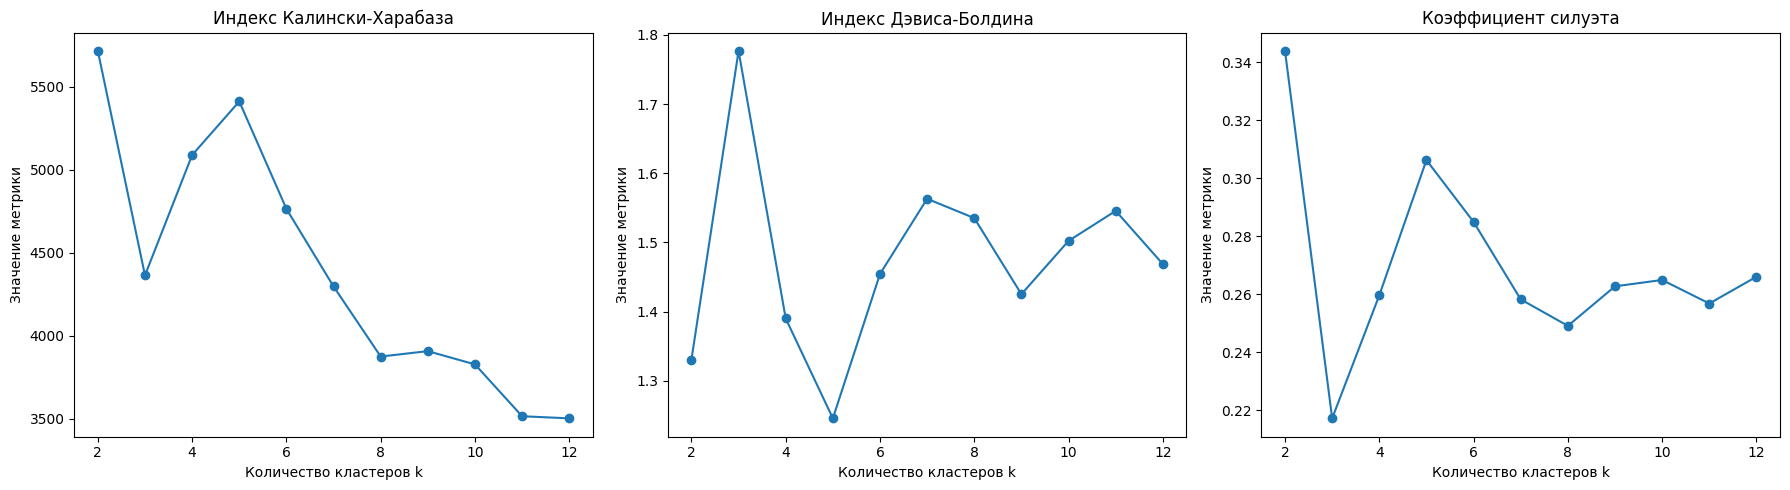

In [16]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()

Видим, что наилучшие значения индексов получаем при **2-х и 5-ти кластерах**.